In [184]:
# Import Dependencies
import pandas as pd
import numpy as np

from citipy import citipy
import random
import json
import requests

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import datetime

# openweathermap api key
from config import api_key


In [185]:
# Get random numbers for latitude and longitude
# Get numbers from size of 5000 to account for dropping duplicates and N/A cities on openweathermap
lat = np.random.randint(low=-90, high=90, size=(5000,))
lng = np.random.randint(low=-180, high=180, size=(5000,))

# Turn it into coordinates
coordinates = [lat,lng]
coordinates_sample = list(zip(*coordinates[::-1]))

# Plug in coordinates into citipy to get list of nearest cities
cities = []
for coordinate_pair in coordinates_sample:
    lati, lon = coordinate_pair
    cities.append(citipy.nearest_city(lati, lon))
    
# Get city name and country code and put in a list
country_code = []
city_name = []
for city in cities: 
    country_code.append(city.country_code)
    city_name.append(city.city_name)

In [186]:
# Make a summary dataframe for cities
cities_df = pd.DataFrame({"Country": country_code,
                          "City":city_name})

# Drop any duplicates
cities_df = cities_df.drop_duplicates(['City','Country'], keep=False)

# Add in empty columns with desired weather info
cities_df['Cloudiness'] = ''
cities_df['Date'] = ''
cities_df['Humidity'] = ''
cities_df['Lat'] = ''
cities_df['Lng'] = ''
cities_df['Max Temp'] = ''
cities_df['Wind Speed'] = ''

In [187]:
# Set parameters for query url 
params = {"appid": api_key, "units": "Imperial"}

# Set a variable for show of records
record = 1

# Print "Beginning of Data Retrieval"
print("Beginning of Data Retrieval")
print("----------------------------")

# Retrieve the data using pd.iterrows()
for index, row in cities_df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    
    # Add in city parameter to parameters
    params['q'] = row['City']
    
    # Make url request from openweathermap api 
    weather_response = requests.get(url, params=params)
    print(f"Processing Record {record} | {row['City']}")
    print(weather_response.url)
    
    # Add one to record for next record
    record += 1
    
    # Make variable to hold response from api
    weather_json = weather_response.json()

    # Fill empty columns in cities_df with info from api. Use try/except for any N/A cities
    try:
        cities_df.set_value(index, "Max Temp", weather_json['main']['temp_max'])
        cities_df.set_value(index, "Country", weather_json['sys']['country'])
        cities_df.set_value(index, "Cloudiness", weather_json['clouds']['all'])
        cities_df.set_value(index, "Date", weather_json['dt'])
        cities_df.set_value(index, "Humidity", weather_json['main']['humidity'])
        cities_df.set_value(index, "Lat", weather_json['coord']['lat'])
        cities_df.set_value(index, "Lng", weather_json['coord']['lon'])
        cities_df.set_value(index, "Wind Speed", weather_json['wind']['speed'])
    except:
        cities_df.set_value(index, "City", np.nan)
        
# Print "Data Retrieval Complete"
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning of Data Retrieval
----------------------------
Processing Record 1 | dekoa
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=dekoa
Processing Record 2 | senanga
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=senanga
Processing Record 3 | malgrat de mar
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=malgrat+de+mar
Processing Record 4 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=plettenberg+bay
Processing Record 5 | georgiyevka
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=georgiyevka
Processing Record 6 | neuruppin
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=neuruppin
Processing Record 7 | marrakesh
http://api.openweathermap.o

Processing Record 58 | krasnyy bogatyr
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=krasnyy+bogatyr
Processing Record 59 | boa vista
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=boa+vista
Processing Record 60 | cheuskiny
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=cheuskiny
Processing Record 61 | certeju de sus
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=certeju+de+sus
Processing Record 62 | hwange
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=hwange
Processing Record 63 | maghama
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=maghama
Processing Record 64 | tromso
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea

Processing Record 115 | varias
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=varias
Processing Record 116 | hare bay
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=hare+bay
Processing Record 117 | matamba
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=matamba
Processing Record 118 | matranovak
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=matranovak
Processing Record 119 | achit
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=achit
Processing Record 120 | caucaia
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=caucaia
Processing Record 121 | kontagora
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=kon

Processing Record 173 | catamarca
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=catamarca
Processing Record 174 | galle
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=galle
Processing Record 175 | jeremoabo
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=jeremoabo
Processing Record 176 | tres arroyos
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=tres+arroyos
Processing Record 177 | azimur
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=azimur
Processing Record 178 | marhaura
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=marhaura
Processing Record 179 | lindi
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperi

Processing Record 230 | diu
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=diu
Processing Record 231 | pafos
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=pafos
Processing Record 232 | bundibugyo
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=bundibugyo
Processing Record 233 | marica
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=marica
Processing Record 234 | bousso
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=bousso
Processing Record 235 | general pico
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=general+pico
Processing Record 236 | san francisco
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=s

Processing Record 286 | doha
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=doha
Processing Record 287 | lenger
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=lenger
Processing Record 288 | vigrestad
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=vigrestad
Processing Record 289 | little current
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=little+current
Processing Record 290 | swellendam
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=swellendam
Processing Record 291 | lubango
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=lubango
Processing Record 292 | faridan
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Im

Processing Record 343 | lichinga
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=lichinga
Processing Record 344 | snasa
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=snasa
Processing Record 345 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=thinadhoo
Processing Record 346 | troitsko-pechorsk
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=troitsko-pechorsk
Processing Record 347 | conceicao da barra
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=conceicao+da+barra
Processing Record 348 | acarau
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=acarau
Processing Record 349 | pushkinskiye gory
http://api.openweathermap.org/data/2.5/weather?appid=d28b1

Processing Record 400 | koulamoutou
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=koulamoutou
Processing Record 401 | ratisbon
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=ratisbon
Processing Record 402 | kazalinsk
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=kazalinsk
Processing Record 403 | dire
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=dire
Processing Record 404 | kayerkan
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=kayerkan
Processing Record 405 | bilma
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=bilma
Processing Record 406 | novaya malykla
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imper

Processing Record 456 | umba
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=umba
Processing Record 457 | mangaratiba
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=mangaratiba
Processing Record 458 | santa rosa del sur
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=santa+rosa+del+sur
Processing Record 459 | lieksa
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=lieksa
Processing Record 460 | kashan
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=kashan
Processing Record 461 | paucartambo
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=paucartambo
Processing Record 462 | marzuq
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea2

Processing Record 513 | karpathos
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=karpathos
Processing Record 514 | gemena
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=gemena
Processing Record 515 | gorno-altaysk
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=gorno-altaysk
Processing Record 516 | gari
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=gari
Processing Record 517 | pedernales
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=pedernales
Processing Record 518 | hell
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=hell
Processing Record 519 | antalaha
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&

Processing Record 570 | morant bay
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=morant+bay
Processing Record 571 | rubiataba
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=rubiataba
Processing Record 572 | monrovia
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=monrovia
Processing Record 573 | japura
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=japura
Processing Record 574 | peque
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=peque
Processing Record 575 | vokhtoga
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=vokhtoga
Processing Record 576 | mrirt
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=m

Processing Record 628 | benicarlo
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=benicarlo
Processing Record 629 | bertoua
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=bertoua
Processing Record 630 | yarega
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=yarega
Processing Record 631 | rudsar
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=rudsar
Processing Record 632 | khoy
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=khoy
Processing Record 633 | karaul
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=karaul
Processing Record 634 | panama city
http://api.openweathermap.org/data/2.5/weather?appid=d28b18768a2e31c92865084cffaea297&units=Imperial&q=panama+city

In [188]:
# Drop any rows with n/a info, then reset index and drop index column
cities_df = cities_df.dropna()
cities_df = cities_df.reset_index(drop=True)

# Write cities_df to csv file
cities_df.to_csv("weatherpy.csv")

# View column names and row count
cities_df.count()

City          571
Country       571
Cloudiness    571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [189]:
# Display city data frame
cities_df.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,senanga,ZM,8,1520468698,82,-16.1,23.3,67.63,2.89
1,malgrat de mar,ES,20,1520467200,100,41.65,2.74,46.4,2.24
2,plettenberg bay,ZA,88,1520468699,100,-34.05,23.37,66.64,13.78
3,georgiyevka,RU,92,1520468699,95,52.25,40.45,26.41,14.18
4,neuruppin,DE,75,1520466600,93,52.92,12.81,35.6,8.05


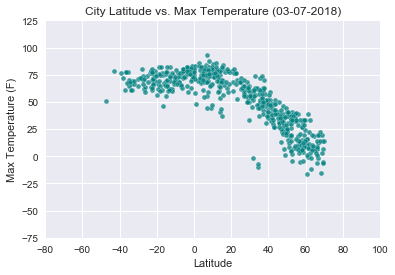

In [190]:
# Get date for whenever the api is run, preferrably in the same day as making the graph
now = datetime.datetime.now()
date = now.strftime("%m-%d-%Y")

# Make scatter plot comparing latitude and temperature
x = cities_df['Lat']
y = cities_df['Max Temp']
plt.scatter(x, y, s=25,facecolors="teal", edgecolors='white', alpha=0.75)

# Set x, y limits
plt.xlim(-80, 100)
plt.ylim(-75, 125)

# Set title and labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({date})")

# Save figure
plt.savefig("lat_vs_temp.png")

# Show plot
plt.show()

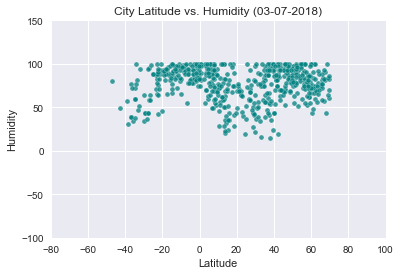

In [191]:
# Make scatter plot comparing latitude and humidity
x1 = cities_df['Lat']
y1 = cities_df['Humidity']
plt.scatter(x1, y1, s=25, facecolors="teal", edgecolors='white', alpha=0.75)

# Set x, y limits
plt.xlim(-80, 100)
plt.ylim(-100, 150)

# Set title and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity ({date})")

# Save figure
plt.savefig("lat_vs_hum.png")

# Show plot
plt.show()

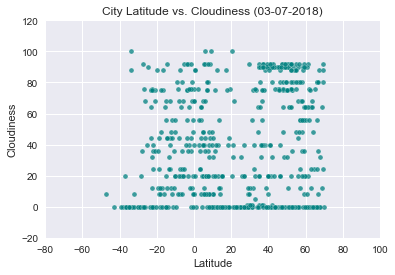

In [192]:
# Make scatter plot comparing latitude and cloudiness
x2 = cities_df['Lat']
y2 = cities_df['Cloudiness']
plt.scatter(x2, y2, s=25, facecolors="teal", edgecolors='white', alpha=0.75)

# Set x, y limits
plt.xlim(-80, 100)
plt.ylim(-20, 120)

# Set title and labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")

# Save figure
plt.savefig("lat_vs_clouds.png")

# Show plot
plt.show()

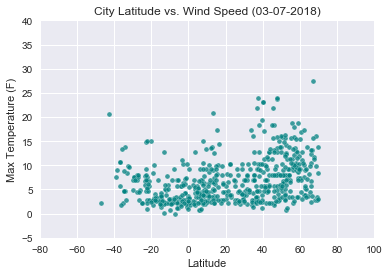

In [193]:
# Make scatter plot comparing latitude and wind speed
x3 = cities_df['Lat']
y3 = cities_df['Wind Speed']
plt.scatter(x3, y3, s=25, facecolors="teal", edgecolors='white', alpha=0.75)

# Set x, y limits
plt.xlim(-80, 100)
plt.ylim(-5, 40)

# Set title and labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Wind Speed ({date})")

# Save figure
plt.savefig("lat_vs_wind.png")

# Show plot
plt.show()